In [1]:
#################################################################
#
# Write for Melbourne Datathon kaggle part
# https://inclass.kaggle.com/c/dsm2017
# Predicting the possiblility of a patient buy diabete drugs in 2016,
# according to the history of this patient buying all kinds of drugs before 2016.
# Patient_ID 1-279200 is used as training data to predict Patient_ID 279201-558325.
#
# This program is used to read training data, 
# find proper parameters for GradientBoostClassifier,
# and write to classifier file for predicting program to use
#
# Nijie Sun
# 2017 May
#
##################################################################

import pandas as pd
import os
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.plotly as py
import numpy as np

# read in X and y

# datas have been drop duplicate and collected in SQL Server
# except ATClevelcode part, since pandas pivot_table is a better tool to deal with it

# read features of training dataset except features about ATClevelcode
df_training_data = pd.read_csv('./trn_final_truth_with15.txt', sep = '\t')
df_training_data

# read ATClevelcode(level 1-3) associated data from training dataset
# only (Patient_ID,year_atclevel,cnt) columns, need to be aggregated in next step
df_atc_data = pd.read_csv('./trn_training_atc123.txt', sep = '\t')
df_atc_data

# read the final truth y from training data 
y = df_training_data['ground_truth']
#print(len(y))

df_atc_data

,Patient_ID,year_atclevel,cnt
0,1,2012A02B,7
1,1,2013N02B,2
2,1,2013R03D,3
3,1,2011C09C,6
4,1,2011A03F,1
5,1,2013A02B,2
6,1,2013N03A,6
7,1,2014N02B,3
8,1,2011N02B,3
9,1,2013C09C,3


In [2]:
# pivot table, the values of year_atclevel as column name
# year_atlevel including the combination of (2011-2014,2015Q1-2015Q4) and (all ATC level 1-3 codes)
pv_table = pd.pivot_table(df_atc_data,values='cnt',index=['Patient_ID'],columns=['year_atclevel'],aggfunc='sum').fillna(0).astype(int)
X=pd.DataFrame(pv_table.to_records())
X

,Patient_ID,2011A,2011A01,2011A01A,2011A02,2011A02A,2011A02B,2011A03,2011A03A,2011A03B,...,Q4V,Q4V03,Q4V03A,Q4V04,Q4V04C,Q4V06,Q4V06D,Q4V07,Q4V07A,inserted
0,1,7,0,0,6,0,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,2,0,0,2,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,6,0,0,6,0,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,8,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,6,0,0,6,0,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# add features together
X[['gender','year_of_birth','postcode','state_code','trans_all','trans_lipids','trans_hypertension','trans_Depression','trans_Immunology','trans_Urology','trans_Anti_Coagulant','trans_Osteoporosis','trans_Heart_Failure','trans_Epilepsy','trans_COPD','trans_Diabetes','Buy_Diabetes','dur_Diabetes_15']]=df_training_data[['gender','year_of_birth','postcode','state_code','trans_all','trans_lipids','trans_hypertension','trans_Depression','trans_Immunology','trans_Urology','trans_Anti_Coagulant','trans_Osteoporosis','trans_Heart_Failure','trans_Epilepsy','trans_COPD','trans_Diabetes','Buy_Diabetes','dur_Diabetes_15']]
X.loc[X['dur_Diabetes_15']>0, 'dur_Diabetes_15']=1
X

279200


,Patient_ID,2011A,2011A01,2011A01A,2011A02,2011A02A,2011A02B,2011A03,2011A03A,2011A03B,...,trans_Immunology,trans_Urology,trans_Anti_Coagulant,trans_Osteoporosis,trans_Heart_Failure,trans_Epilepsy,trans_COPD,trans_Diabetes,Buy_Diabetes,dur_Diabetes_15
0,1,7,0,0,6,0,6,1,0,0,...,0,0,0,0,0,20,26,0,0,0
1,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,2,0,0,2,0,2,0,0,0,...,0,0,0,0,9,0,0,0,0,0
4,5,6,0,0,6,0,6,0,0,0,...,0,0,0,0,11,0,0,0,0,0
5,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,6,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,0
7,8,1,0,0,1,0,1,0,0,0,...,0,0,0,0,4,0,0,0,0,0
8,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,6,0,0,6,0,6,0,0,0,...,0,0,0,0,26,0,0,0,0,0


In [4]:
# In order to save memory
# write orignial features into 3 seperated files
# one for int8(over 2 thousand features), one for int16(39 features), one for varchar(9)
# these three files could be read in afterwards
# so that next time training only need deal with these three files 

with open('headers123.small.txt') as f: # headers123.small.txt has all the feature names of int16
    list16 = f.read().splitlines()
Xint16=X[list16]
Xint16
Xint16.to_csv('./Xint16_level123.dat', sep='\t', index=False)

with open('headers123.txt') as f: # headers123.txt has all the feature names of int18
    list8 = f.read().splitlines()
Xint8=X[list8]
Xint8
Xint8.to_csv('./Xint8_level123.dat', sep='\t', index=False)

X_gender=X[['Patient_ID','gender']]
X_gender
X_gender.to_csv('./X_gender_level123.dat', sep='\t', index=False)

Xint16

['2011C',
 '2011N',
 '2011N02',
 '2011N02A',
 '2011N07',
 '2011N07B',
 '2011NA',
 '2012C',
 '2012N',
 '2012N02',
 '2012N02A',
 '2012N07',
 '2012N07B',
 '2012NA',
 '2013C',
 '2013N',
 '2013N02',
 '2013N02A',
 '2013N02C',
 '2013N05',
 '2013NA',
 '2014C',
 '2014J',
 '2014J01',
 '2014N',
 '2014N02',
 '2014N02A',
 '2014N02C',
 '2014N05',
 '2014NA',
 'year_of_birth',
 'postcode',
 'trans_all',
 'trans_lipids',
 'trans_hypertension',
 'trans_Depression',
 'trans_Epilepsy',
 'trans_COPD',
 'trans_Diabetes']

In [1]:
import pandas as pd # begin 
import numpy as np

import sys
import os
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.cross_validation import KFold
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from itertools import tee, islice, chain

from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import cross_validation, metrics   #Additional sklearn functions
from sklearn.grid_search import GridSearchCV   #Performing grid search

import matplotlib.pylab as plt
%matplotlib inline

# read header of int16 type features
with open('headers123.small.txt') as f:
    list16 = f.read().splitlines()

# read 3 part features of training data by 3 different types to save memory
X=pd.read_csv('./Xint8_level123.dat', sep = '\t', dtype=np.int8)
X

Xint16=pd.read_csv('./Xint16_level123.dat', sep = '\t', dtype=np.int16)
Xint16

X_gender=pd.read_csv('./X_gender_level123.dat', sep = '\t')
X_gender

X[list16]=Xint16[list16]

X['gender']=X_gender['gender']
X

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279200 entries, 0 to 279199
Columns: 2185 entries, 2011A to gender
dtypes: int16(39), int8(2145), object(1)
memory usage: 594.0+ MB


In [3]:
# delete Patient_ID column
#X.drop('Patient_ID',1,inplace=True)
del X['Patient_ID']

In [8]:
#change X to dictionary and vectorize it

#X=X.to_dict(orient='record')
X = X.T.to_dict().values()
print('X len:', len(X))

vectorizer = DictVectorizer(dtype=np.int16, sparse=True)
X = vectorizer.fit_transform(X)

True
X len: 279200


In [11]:
# used when X read from 3 seperated files as 3 data type 
df_training_data = pd.read_csv('./trn_final_truth_with15.txt', sep = '\t')
y = df_training_data['ground_truth']
#print('y len:', len(y))
y

0         0
1         0
2         0
3         0
4         0
5         0
6         1
7         0
8         0
9         0
10        0
11        1
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        1
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
279170    0
279171    0
279172    0
279173    0
279174    0
279175    1
279176    1
279177    0
279178    0
279179    1
279180    0
279181    0
279182    0
279183    0
279184    0
279185    0
279186    0
279187    0
279188    0
279189    1
279190    0
279191    0
279192    0
279193    0
279194    0
279195    1
279196    0
279197    1
279198    0
279199    1
Name: ground_truth, dtype: int64

In [12]:
#################################################################
#
# modelfit method and grid search
#
##################################################################

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

def modelfit(alg, X_model, y_model, predictors, writeClassifier=False, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(X_model, y_model)

    #Predict training set:
    dtrain_predictions = alg.predict(X_model)
    dtrain_predprob = alg.predict_proba(X_model)[:,1]

    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, X_model, y_model, cv=cv_folds, scoring='roc_auc')

    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(y_model.values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(y_model, dtrain_predprob))

    if performCV:
        print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    # write classifier and vectorizer into files
    if writeClassifier:    
        print('Begin write files:')
        #classifier_path = './datathon/kaggle/test_files/classifier.dat'
        classifier_path = './classifier.dat'
        with open(classifier_path, 'wb') as classifier_f:
            pickle.dump(alg, classifier_f)
        #with open('./datathon/kaggle/test_files/vectorizer.dat', 'wb') as vectorizer_f:
        with open('./vectorizer.dat', 'wb') as vectorizer_f:
            pickle.dump(vectorizer, vectorizer_f) 
        print('Write files end.')
    
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')


Model Report
Accuracy : 0.9624
AUC Score (Train): 0.968547
CV Score : Mean - 0.9667527 | Std - 0.0007184278 | Min - 0.9659199 | Max - 0.9677314
Begin write files:
Write files end.


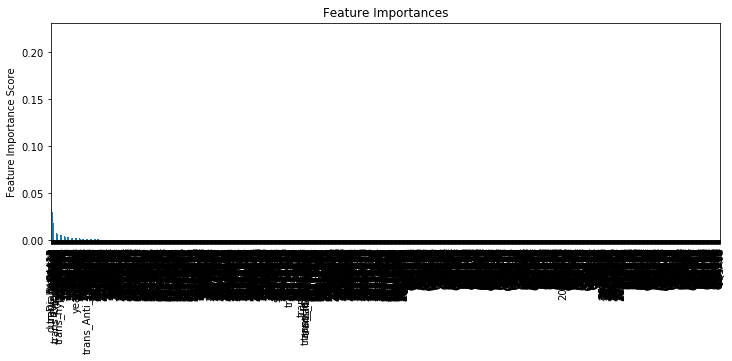

In [13]:
# ATC
#CV and write classifier and vectorizer use default parameters
predictors = vectorizer.get_feature_names()
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, X.toarray(), y, predictors, writeClassifier=True)

In [12]:
# learning_rate=0.05, n_estimators=200
predictors = vectorizer.get_feature_names()
gbm0 = GradientBoostingClassifier(learning_rate=0.05,n_estimators=200,min_samples_split=1000,min_samples_leaf=50,
                                  max_depth=6,max_features='sqrt',subsample=0.8,random_state=10)
modelfit(gbm0, X.toarray(), y, predictors, writeClassifier=True, printFeatureImportance=False,file_name='1000_6_sample')


Model Report
Accuracy : 0.9626
AUC Score (Train): 0.972403
CV Score : Mean - 0.9684887 | Std - 0.000937268 | Min - 0.9668314 | Max - 0.96975
Begin write files:
Write files end.


In [8]:
# learning_rate=0.05, n_estimators=300
predictors = vectorizer.get_feature_names()
gbm0 = GradientBoostingClassifier(learning_rate=0.05,n_estimators=300,min_samples_split=500,min_samples_leaf=50,
                                  max_depth=8,max_features='sqrt',subsample=0.8,random_state=10)
modelfit(gbm0, X.toarray(), y, predictors, writeClassifier=True, printFeatureImportance=False,file_name='300')


Model Report
Accuracy : 0.9643
AUC Score (Train): 0.977466
CV Score : Mean - 0.9689846 | Std - 0.0008467114 | Min - 0.9677853 | Max - 0.9703614
Begin write files:
Write files end.


In [9]:
# learning_rate=0.02, n_estimators=500
predictors = vectorizer.get_feature_names()
gbm0 = GradientBoostingClassifier(learning_rate=0.02,n_estimators=500,min_samples_split=500,min_samples_leaf=50,
                                  max_depth=8,max_features='sqrt',subsample=0.8,random_state=10)
modelfit(gbm0, X.toarray(), y, predictors, writeClassifier=True, printFeatureImportance=False,file_name='500')


Model Report
Accuracy : 0.9637
AUC Score (Train): 0.976336
CV Score : Mean - 0.9692438 | Std - 0.0007299284 | Min - 0.9683086 | Max - 0.9704983
Begin write files:
Write files end.


In [10]:
# learning_rate=0.02, n_estimators=800
predictors = vectorizer.get_feature_names()
gbm0 = GradientBoostingClassifier(learning_rate=0.02,n_estimators=800,min_samples_split=500,min_samples_leaf=50,
                                  max_depth=8,max_features='sqrt',subsample=0.8,random_state=10)
modelfit(gbm0, X.toarray(), y, predictors, writeClassifier=True, printFeatureImportance=False,file_name='800')


Model Report
Accuracy : 0.9643
AUC Score (Train): 0.978004
CV Score : Mean - 0.969227 | Std - 0.0007514279 | Min - 0.9682865 | Max - 0.9705292
Begin write files:
Write files end.


In [11]:
# learning_rate=0.01, n_estimators=1000
predictors = vectorizer.get_feature_names()
gbm0 = GradientBoostingClassifier(learning_rate=0.01,n_estimators=1000,min_samples_split=500,min_samples_leaf=50,
                                  max_depth=8,max_features='sqrt',subsample=0.8,random_state=10)
modelfit(gbm0, X.toarray(), y, predictors, writeClassifier=True, printFeatureImportance=False,file_name='1000')


Model Report
Accuracy : 0.9636
AUC Score (Train): 0.976405
CV Score : Mean - 0.9693947 | Std - 0.0006961927 | Min - 0.9684443 | Max - 0.9705524
Begin write files:
Write files end.


In [ ]:
# the following code is used before adding atc level code features
# including grid search and features adjust


Model Report
Accuracy : 0.9499
AUC Score (Train): 0.962496
CV Score : Mean - 0.9614121 | Std - 0.001018382 | Min - 0.9600908 | Max - 0.9626864
Begin write files:
Write files end.


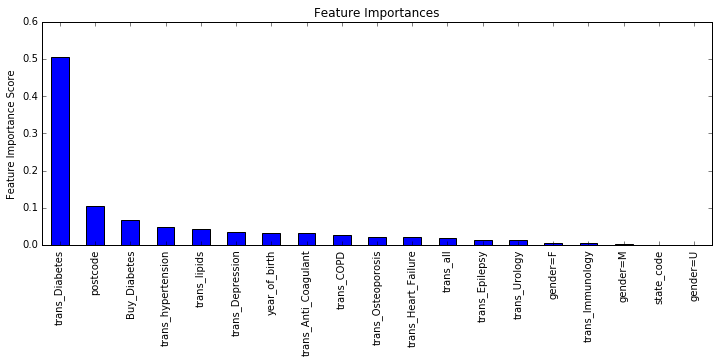

In [8]:
#CV and write classifier and vectorizer use default parameters, 
#better than logistic regression only
predictors = vectorizer.get_feature_names()
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, X.toarray(), y, predictors, writeClassifier=True)


Model Report
Accuracy : 0.9499
AUC Score (Train): 0.962496
CV Score : Mean - 0.9614121 | Std - 0.001018382 | Min - 0.9600908 | Max - 0.9626864


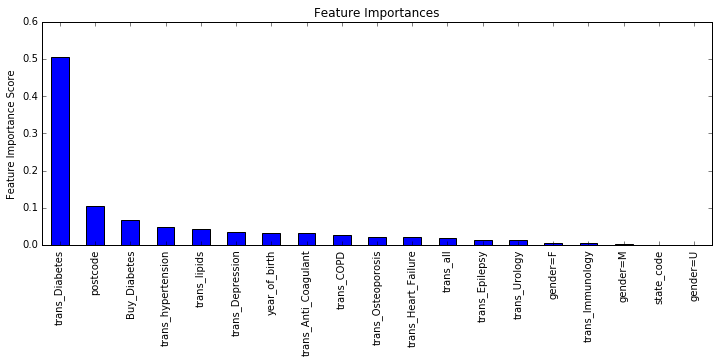

In [17]:
# Grid search

# use default parameters

#get predictors by the vectorizer
predictors = vectorizer.get_feature_names()
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, X.toarray(), y, predictors)

In [22]:

# find best n_estimators parameter(number of trees) 
param_test1 = {'n_estimators' : [20,30,40,50,60,70,80]}
print(param_test1)
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X.toarray(),y)

{'n_estimators': [20, 30, 40, 50, 60, 70, 80]}


GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=8, max_features='sqrt', max_leaf_nodes=None,
              min_samples_leaf=50, min_samples_split=500,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'n_estimators': [20, 30, 40, 50, 60, 70, 80]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [23]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.96129, std: 0.00086, params: {'n_estimators': 20},
  mean: 0.96171, std: 0.00072, params: {'n_estimators': 30},
  mean: 0.96192, std: 0.00061, params: {'n_estimators': 40},
  mean: 0.96192, std: 0.00064, params: {'n_estimators': 50},
  mean: 0.96201, std: 0.00063, params: {'n_estimators': 60},
  mean: 0.96200, std: 0.00064, params: {'n_estimators': 70},
  mean: 0.96202, std: 0.00063, params: {'n_estimators': 80}],
 {'n_estimators': 80},
 0.96201891672172157)

In [24]:
# find best n_estimators parameter(number of trees) 
param_test1 = {'n_estimators' : [70,80,90,100]}
print(param_test1)
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X.toarray(),y)

{'n_estimators': [70, 80, 90, 100]}


GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=8, max_features='sqrt', max_leaf_nodes=None,
              min_samples_leaf=50, min_samples_split=500,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'n_estimators': [70, 80, 90, 100]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [25]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.96200, std: 0.00064, params: {'n_estimators': 70},
  mean: 0.96202, std: 0.00063, params: {'n_estimators': 80},
  mean: 0.96201, std: 0.00058, params: {'n_estimators': 90},
  mean: 0.96200, std: 0.00057, params: {'n_estimators': 100}],
 {'n_estimators': 80},
 0.96201891672172157)

In [5]:
# find best n_estimators parameter(number of trees) 
# min_samples_split=1395,min_samples_leaf=50
param_test1 = {'n_estimators' : [20,30,40,50,60,70,80]}
print(param_test1)
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=1395,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X.toarray(),y)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

{'n_estimators': [20, 30, 40, 50, 60, 70, 80]}


([mean: 0.96120, std: 0.00099, params: {'n_estimators': 20},
  mean: 0.96183, std: 0.00088, params: {'n_estimators': 30},
  mean: 0.96216, std: 0.00082, params: {'n_estimators': 40},
  mean: 0.96224, std: 0.00074, params: {'n_estimators': 50},
  mean: 0.96230, std: 0.00063, params: {'n_estimators': 60},
  mean: 0.96232, std: 0.00058, params: {'n_estimators': 70},
  mean: 0.96241, std: 0.00059, params: {'n_estimators': 80}],
 {'n_estimators': 80},
 0.96241440458879202)

In [6]:
# find best n_estimators parameter(number of trees) 
# min_samples_split=1395,min_samples_leaf=100
#param_test1 = {'n_estimators' : list(range(20,81,10))}
param_test1 = {'n_estimators' : [20,30,40,50,60,70,80]}
print(param_test1)
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=1395,min_samples_leaf=100,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X.toarray(),y)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

{'n_estimators': [20, 30, 40, 50, 60, 70, 80]}


([mean: 0.96139, std: 0.00083, params: {'n_estimators': 20},
  mean: 0.96206, std: 0.00086, params: {'n_estimators': 30},
  mean: 0.96221, std: 0.00081, params: {'n_estimators': 40},
  mean: 0.96219, std: 0.00081, params: {'n_estimators': 50},
  mean: 0.96227, std: 0.00070, params: {'n_estimators': 60},
  mean: 0.96225, std: 0.00063, params: {'n_estimators': 70},
  mean: 0.96223, std: 0.00067, params: {'n_estimators': 80}],
 {'n_estimators': 60},
 0.9622747406752199)

In [5]:
# find proper max_depth and min_samples_split
param_test2 = {'max_depth': list(range(5,16,2)), 'min_samples_split':list(range(1000,1801,200))}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X.toarray(),y)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.96163, std: 0.00070, params: {'min_samples_split': 1000, 'max_depth': 5},
  mean: 0.96154, std: 0.00087, params: {'min_samples_split': 1200, 'max_depth': 5},
  mean: 0.96174, std: 0.00078, params: {'min_samples_split': 1400, 'max_depth': 5},
  mean: 0.96182, std: 0.00089, params: {'min_samples_split': 1600, 'max_depth': 5},
  mean: 0.96172, std: 0.00097, params: {'min_samples_split': 1800, 'max_depth': 5},
  mean: 0.96215, std: 0.00065, params: {'min_samples_split': 1000, 'max_depth': 7},
  mean: 0.96213, std: 0.00075, params: {'min_samples_split': 1200, 'max_depth': 7},
  mean: 0.96203, std: 0.00084, params: {'min_samples_split': 1400, 'max_depth': 7},
  mean: 0.96211, std: 0.00078, params: {'min_samples_split': 1600, 'max_depth': 7},
  mean: 0.96197, std: 0.00061, params: {'min_samples_split': 1800, 'max_depth': 7},
  mean: 0.96205, std: 0.00069, params: {'min_samples_split': 1000, 'max_depth': 9},
  mean: 0.96210, std: 0.00055, params: {'min_samples_split': 1200, 'max_dept

In [ ]:
# find proper n_estimators, max_depth and min_samples_split
param_test2 = {'n_estimators' : [60,70,80],'max_depth': list(range(5,16,2)), 'min_samples_split':list(range(1000,1801,200))}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X.toarray(),y)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

In [4]:
# find proper min_samples_leaf
param_test3 = {'min_samples_leaf':list(range(30,101,10))}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9,min_samples_split=1395,max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X.toarray(),y)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.96201, std: 0.00071, params: {'min_samples_leaf': 30},
  mean: 0.96227, std: 0.00071, params: {'min_samples_leaf': 40},
  mean: 0.96215, std: 0.00062, params: {'min_samples_leaf': 50},
  mean: 0.96209, std: 0.00078, params: {'min_samples_leaf': 60},
  mean: 0.96213, std: 0.00059, params: {'min_samples_leaf': 70},
  mean: 0.96204, std: 0.00062, params: {'min_samples_leaf': 80},
  mean: 0.96184, std: 0.00068, params: {'min_samples_leaf': 90},
  mean: 0.96209, std: 0.00071, params: {'min_samples_leaf': 100}],
 {'min_samples_leaf': 40},
 0.96227437990982168)

In [6]:
# find proper max_features
param_test4 = {'max_features':list(range(3,16,2))}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9, min_samples_split=1395, min_samples_leaf=40, subsample=0.8, random_state=10),
param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(X.toarray(),y)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.96184, std: 0.00076, params: {'max_features': 3},
  mean: 0.96204, std: 0.00069, params: {'max_features': 5},
  mean: 0.96213, std: 0.00070, params: {'max_features': 7},
  mean: 0.96202, std: 0.00061, params: {'max_features': 9},
  mean: 0.96222, std: 0.00064, params: {'max_features': 11},
  mean: 0.96208, std: 0.00063, params: {'max_features': 13},
  mean: 0.96209, std: 0.00064, params: {'max_features': 15}],
 {'max_features': 11},
 0.96221991520977179)

In [ ]:
# parameters decided
#GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9, min_samples_split=1395, min_samples_leaf=40, max_features=11, subsample=0.8, random_state=10)


Model Report
Accuracy : 0.9511
AUC Score (Train): 0.968020
CV Score : Mean - 0.9624384 | Std - 0.0006740239 | Min - 0.9615149 | Max - 0.9635107
Begin write files:
Write files end.


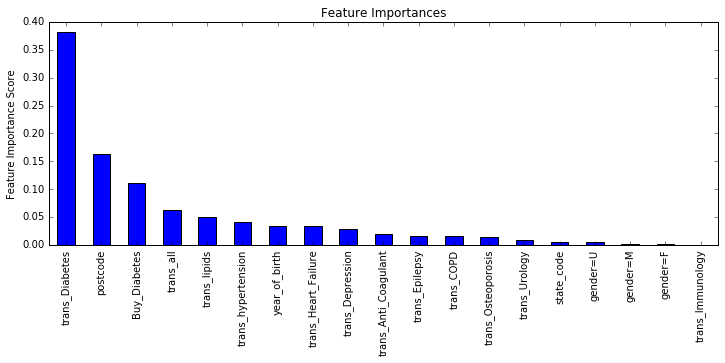

In [6]:
# all parameters have been found, 
# but learning_rate and n_estimators could be tuning again next step

#CV and write classifier and vectorizer
predictors = vectorizer.get_feature_names()
gbm0 = GradientBoostingClassifier(learning_rate=0.1, n_estimators=80,max_depth=7, min_samples_split=1000, min_samples_leaf=60, max_features=13, subsample=0.8, random_state=10)

modelfit(gbm0, X.toarray(), y, predictors, writeClassifier=True)


Model Report
Accuracy : 0.951
AUC Score (Train): 0.968290
CV Score : Mean - 0.9623327 | Std - 0.0006088592 | Min - 0.9613867 | Max - 0.9630616
Begin write files:
Write files end.


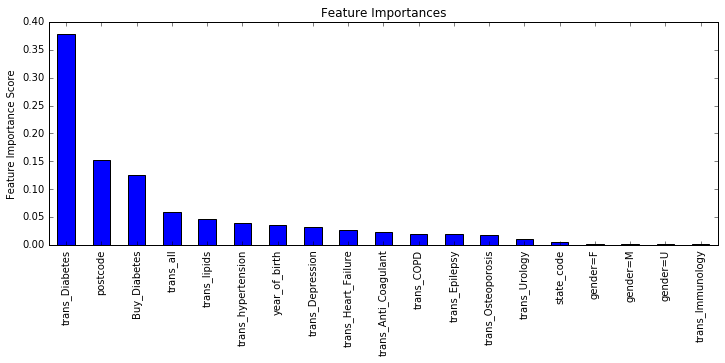

In [9]:
# begin change learning_rate and n_estimators by inverse ratio

#CV and write classifier and vectorizer, decrease learning_rate to 0.05
predictors = vectorizer.get_feature_names()
gbm0 = GradientBoostingClassifier(learning_rate=0.05, n_estimators=160,max_depth=7, min_samples_split=1000, min_samples_leaf=60, max_features=13, subsample=0.8, random_state=10)

modelfit(gbm0, X.toarray(), y, predictors, writeClassifier=True)


Model Report
Accuracy : 0.9512
AUC Score (Train): 0.968531
CV Score : Mean - 0.962549 | Std - 0.0006458951 | Min - 0.961534 | Max - 0.963403
Begin write files:
Write files end.


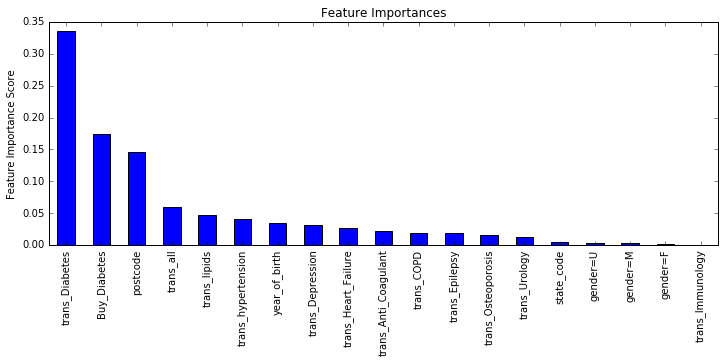

In [10]:
#CV and write classifier and vectorizer, decrease learning_rate to 0.01 and n_estimators = 800
predictors = vectorizer.get_feature_names()
gbm0 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=800,max_depth=7, min_samples_split=1000, min_samples_leaf=60, max_features=13, subsample=0.8, random_state=10)

modelfit(gbm0, X.toarray(), y, predictors, writeClassifier=True)


Model Report
Accuracy : 0.951
AUC Score (Train): 0.968561
CV Score : Mean - 0.9624758 | Std - 0.0006005277 | Min - 0.9615954 | Max - 0.9633025
Begin write files:
Write files end.


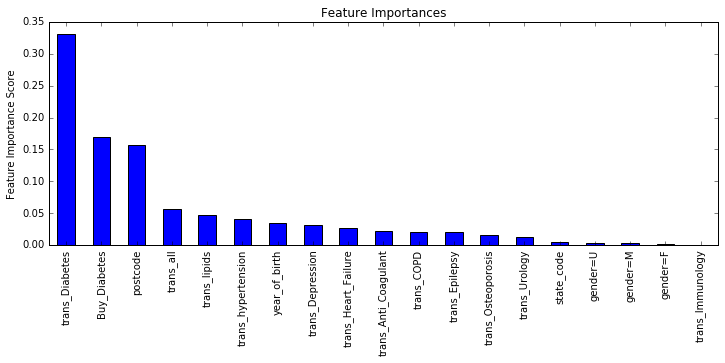

In [4]:
#CV and write classifier and vectorizer, decrease learning_rate to 0.008, worse
predictors = vectorizer.get_feature_names()
gbm0 = GradientBoostingClassifier(learning_rate=0.008, n_estimators=1000,max_depth=7, min_samples_split=1000, min_samples_leaf=60, max_features=13, subsample=0.8, random_state=10)

modelfit(gbm0, X.toarray(), y, predictors, writeClassifier=True)


Model Report
Accuracy : 0.9511
AUC Score (Train): 0.968576
CV Score : Mean - 0.9624651 | Std - 0.0005879274 | Min - 0.9615758 | Max - 0.963246
Begin write files:
Write files end.


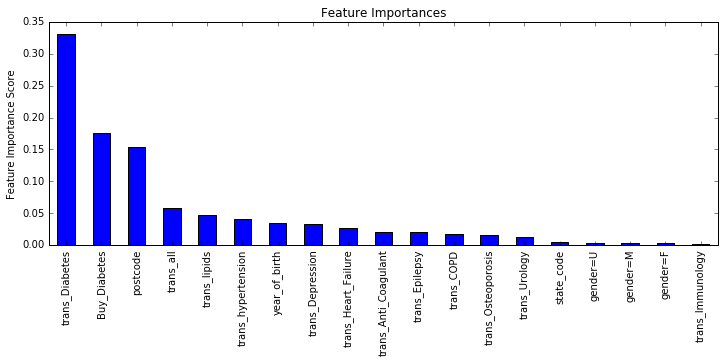

In [11]:
#CV and write classifier and vectorizer, decrease learning_rate to 0.005, even worse
predictors = vectorizer.get_feature_names()
gbm0 = GradientBoostingClassifier(learning_rate=0.005, n_estimators=1600,max_depth=7, min_samples_split=1000, min_samples_leaf=60, max_features=13, subsample=0.8, random_state=10)

modelfit(gbm0, X.toarray(), y, predictors, writeClassifier=True)


Model Report
Accuracy : 0.9515
AUC Score (Train): 0.969336
CV Score : Mean - 0.9626116 | Std - 0.0006036593 | Min - 0.9615782 | Max - 0.9633089
Begin write files:
Write files end.


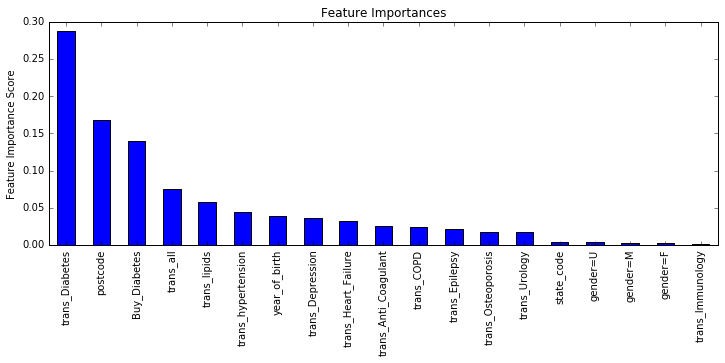

In [5]:
# get best parameters

# from last two step we know learning_rate=0.01 is the best, the only add n_estimators now

#CV and write classifier and vectorizer, decrease learning_rate to 0.01 and n_estimators=1100
predictors = vectorizer.get_feature_names()
gbm0 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=1100,max_depth=7, min_samples_split=1000, min_samples_leaf=60, max_features=13, subsample=0.8, random_state=10)

modelfit(gbm0, X.toarray(), y, predictors, writeClassifier=True)


Model Report
Accuracy : 0.9624
AUC Score (Train): 0.972297
CV Score : Mean - 0.9661956 | Std - 0.0005764721 | Min - 0.9653761 | Max - 0.9668807
Begin write files:
Write files end.


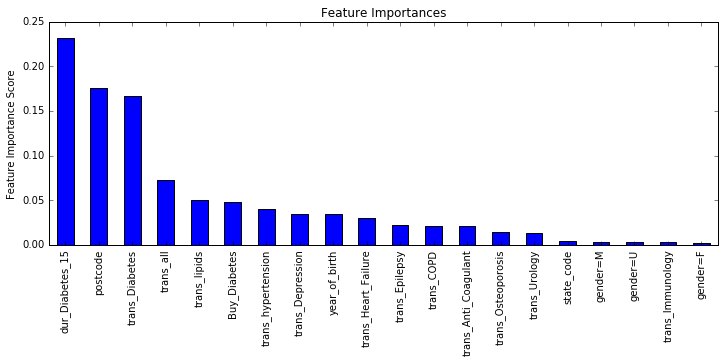

In [20]:
# begin features adjust

# add buy diabete 2015
predictors = vectorizer.get_feature_names()
gbm0 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=1100,max_depth=7, min_samples_split=1000, min_samples_leaf=60, max_features=13, subsample=0.8, random_state=10)
modelfit(gbm0, X.toarray(), y, predictors, writeClassifier=True)


Model Report
Accuracy : 0.9625
AUC Score (Train): 0.972132
CV Score : Mean - 0.9662176 | Std - 0.000565008 | Min - 0.9654181 | Max - 0.9669285
Begin write files:
Write files end.


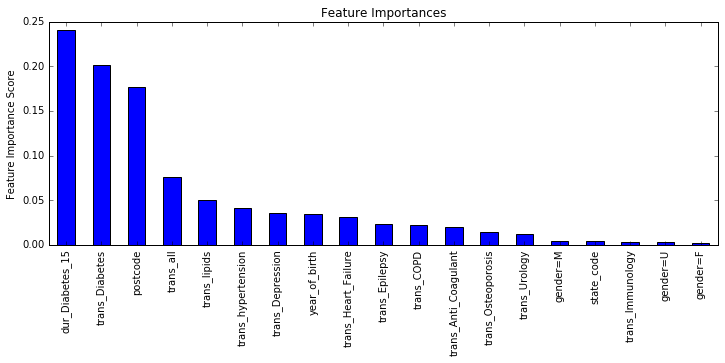

In [5]:
# this is better (CV Score : Mean - 0.9662176), get 0.96666 in leadboard

# add buy diabete 2015(save in dur_Diabetes_15 change values), remove buy diabete
predictors = vectorizer.get_feature_names()
gbm0 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=1100,max_depth=7, min_samples_split=1000, min_samples_leaf=60, max_features=13, subsample=0.8, random_state=10)
modelfit(gbm0, X.toarray(), y, predictors, writeClassifier=True)

In [ ]:
#################################################################
#
# the following is logisticRegression part, without ATClevel(1-3)code features
# there is only 0.0001 improvement when ensamble 
# 0.2*LogisticRegression result + 0.8*GradientBoostClassifier result
# half and half will reduce the auc score in leadboard
# I did not use LogisticRegression after add ATClevel(1-3)code features
# because of memory limitation of my laptop
#
#################################################################


In [4]:
#def test_LogisticRegression(train_X, train_y, test_X, test_y, debug=False):
def test_LogisticRegression(train_X, train_y, test_X, test_y, test_lr):
# penalty='l1' is better than 'l2'. Why???
    #test_lr = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1,
                            #class_weight=None, random_state=None, solver='liblinear', max_iter=100, multi_class='ovr',
                            #verbose=0, warm_start=False, n_jobs=1)

    #test_lr.fit_transform(train_X, train_y)
    test_lr.fit(train_X, train_y)
    train_error = test_lr.score(train_X, train_y)
    test_error = test_lr.score(test_X, test_y)
    #print(test_lr.predict_proba(test_X))
    #print (test_lr.predict(test_X))
    predict_y = test_lr.predict(test_X)
    #predict_y = test_lr.predict_proba(test_X)
    
    #f1_value = f1_score(y_true=test_y, y_pred=predict_y, average='binary')
    f1_value = roc_auc_score(y_true=test_y, y_score=predict_y, average='weighted')
    #f1_value = f1_score(y_true=test_y, y_pred=predict_y, average='weighted')

    #print("f1:", f1_value)
    #print (test_y)
    #if debug:
    #    print('training error:\t{}'.format(train_error))
    #    print('testing error:\t{}'.format(test_error))
    #with open('./classifier.dat', 'wb') as f:
    #    pickle.dump(test_lr, f)

    return train_error, test_error, f1_value, test_lr

def cv_LogisticRegression(classifier):
    train_error_total = 0
    test_error_total = 0
    f1_total = 0
    for train, test in kf:
        train_X = X[train]
        test_X = X[test]
        train_y = y[train]
        test_y = y[test]
        train_error, test_error, f1v, lr = test_LogisticRegression(train_X, train_y, test_X, test_y, classifier)
        train_error_total += train_error
        test_error_total += test_error
        f1_total += f1v
    print('===================')
    print('avg. training error:\t{}'.format(train_error_total / n_folds))
    print('avg. testing error:\t{}'.format(test_error_total / n_folds))
    print('avg. f1:\t{}'.format(f1_total / n_folds))


    return train_error_total / n_folds, test_error_total / n_folds, f1_total / n_folds, lr

def set_parameter(test_penalty, test_C):
    print(test_penalty, ' ', test_C)
    p_lr = LogisticRegression(penalty=test_penalty, dual=False, tol=0.0001, C=test_C, fit_intercept=True, intercept_scaling=1,
                            class_weight=None, random_state=None, solver='liblinear', max_iter=100, multi_class='ovr',
                            verbose=0, warm_start=False, n_jobs=1)
    avg_train_error, avg_test_error, avg_f1, classifier = cv_LogisticRegression(p_lr)
    return avg_train_error, avg_test_error, avg_f1, classifier

def cv_plot_LogistiRegression(t_penalty):
    print(t_penalty)

    cv_res = []
    #rng = sorted([1] + list(range(2, 16, 2)))
    #rng = sorted([10, 15, 35] + list(range(19, 27)))
    #rng = sorted([0.1, 1, 10, 100, 1000])
    #rng = sorted([5, 7, 10, 50, 70, 100])
    #rng = sorted([5, 7, 10, 15, 20])
    #rng = sorted([9, 10, 12, 13, 15, 17, 19, 21,25,30])
    rng = sorted([10,15,20,30,50,100])
    #rng = sorted([20,25,30,35,40,45])
    #rng = sorted([20,30,50,100])
    for i in rng:
        train_error, test_error, f1_error, cla = set_parameter(t_penalty, i)
        cv_res.append([i, train_error, test_error, f1_error])
    cv_res_arr = np.array(cv_res)
    plt.figure(figsize=(16,9))
    plt.title('Error vs. alpha')
    plot_train, = plt.plot(cv_res_arr[:,0], cv_res_arr[:,1], label='training')
    plot_test, = plt.plot(cv_res_arr[:,0], cv_res_arr[:,2], label='testing')
    plot_f1, = plt.plot(cv_res_arr[:,0], cv_res_arr[:,3], label='f1')
    #plt.legend(handles=[plot_train, plot_test, plot_f1])
    #plt.ylim((min(min(cv_res_arr[:,1]), min(cv_res_arr[:,2]), min(cv_res_arr[:,3])) - 0.01, max(max(cv_res_arr[:,1]), max(cv_res_arr[:,2]), max(cv_res_arr[:,3]))+0.01))
    plt.legend(handles=[plot_train, plot_test])
    plt.ylim((min(min(cv_res_arr[:,1]), min(cv_res_arr[:,2])) - 0.01, max(max(cv_res_arr[:,1]), max(cv_res_arr[:,2]))+0.01))
    plt.xticks(rng)

    
   

In [5]:
n_folds = 10
kf = KFold(n=X.shape[0], n_folds=n_folds, shuffle=True, random_state=42)
    #lr = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1,
    #                        class_weight=None, random_state=None, solver='liblinear', max_iter=100, multi_class='ovr',
    #                        verbose=0, warm_start=False, n_jobs=1)
lr = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=15.0, fit_intercept=True, intercept_scaling=1,
#lr = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=30.0, fit_intercept=True, intercept_scaling=1,
                        class_weight=None, random_state=None, solver='liblinear', max_iter=100, multi_class='ovr',
                        verbose=0, warm_start=False, n_jobs=1)
avg_train_error, avg_test_error, avg_f1, classifier = cv_LogisticRegression(lr)
print('Yes')

# Use the following line "cv_plot_LogistiRegression('l1')" to calculate scores(times depends rng[] list) and plot
#cv_plot_LogistiRegression('l1')
classifier_path = './datathon/kaggle/test_files/classifier.dat'
with open(classifier_path, 'wb') as classifier_f:
    pickle.dump(classifier, classifier_f)

with open('./datathon/kaggle/test_files/vectorizer.dat', 'wb') as vectorizer_f:
    pickle.dump(vectorizer, vectorizer_f) 

avg. training error:	0.9484730181470871
avg. testing error:	0.9484563037249283
avg. f1:	0.942723387651631
Yes
